In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('combine_19_20_21_sale.xlsx')

In [3]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

<AxesSubplot:>

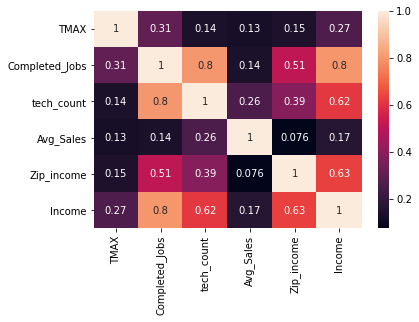

In [5]:
sns.heatmap(df.corr(method='spearman'),annot=True)

In [6]:
df['year'] = df['Created Date'].dt.year
df['month'] = df['Created Date'].dt.month
df['day'] = df['Created Date'].dt.month


df['weekday'] = df['Created Date'].dt.dayofweek

df['quarter'] = df['Created Date'].dt.quarter

In [7]:
df=df.drop(['Created Date'],axis=1)

In [8]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [9]:
encode(df,'month',12)
encode(df,'day',365)
encode(df,'weekday',7)
encode(df,'quarter',4)

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,2019,1,1,3,1,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,2019,1,1,4,1,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,2019,1,1,5,1,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,2019,1,1,6,1,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,2019,1,1,0,1,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2021,4,4,4,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [10]:
df=df.drop(['month', 'day', 'weekday', 'quarter'],axis=1)

In [11]:
df['year'] = df['year'].map({2019: 0, 2020: 1,2021:2})

In [12]:
df

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,0,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,0,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,0,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,0,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,0,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [13]:
df['f1']=np.abs(df['Completed_Jobs'])*np.abs(df['Zip_income'])
df['f2']=np.sqrt(df['Completed_Jobs']**3)*np.abs(df['Avg_Sales'])
df['f3']=np.abs(np.sqrt(df['Completed_Jobs']) - np.sqrt(df['tech_count']))
df['f4']=np.log(np.sqrt(df['Completed_Jobs'])*df['TMAX']**3)

In [14]:
df.columns

Index(['TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales', 'Zip_income',
       'Income', 'year', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'weekday_sin', 'weekday_cos', 'quarter_sin', 'quarter_cos', 'f1', 'f2',
       'f3', 'f4'],
      dtype='object')

In [15]:
df1=df[['f1', 'f2','f3', 'f4','year',  'month_cos',  'quarter_sin','Income']]

In [16]:
df1=df1.drop_duplicates(ignore_index=True)

In [17]:
df1.shape

(726, 8)

<AxesSubplot:>

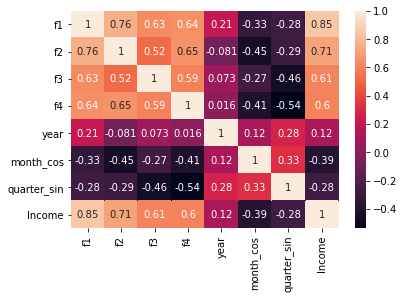

In [18]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [19]:
train=df1[0:600]
test=df1[600:]

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
reg = ExtraTreesRegressor(n_estimators = 100,max_features='auto',max_depth= 6,min_samples_split=2,min_weight_fraction_leaf= 0.0,n_jobs =-1
)


In [22]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [23]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [24]:
reg.fit(X,y)

ExtraTreesRegressor(max_depth=6, n_jobs=-1)

In [25]:
#train data 
reg.score(X,y)

0.8170252384414832

In [26]:
# unseen data(test data)
reg.score(X_,y_)

0.7873769029950053

In [27]:
y_pred=reg.predict(X_)

In [28]:
comp=pd.DataFrame({'Actual':y_,'predicted':y_pred})

In [29]:
comp['Error']=comp['Actual']-comp['predicted']

In [31]:
comp[0:30]

,Actual,predicted,Error
600,86287.17,87346.267090,-1059.097090
601,79380.38,77389.898247,1990.481753
602,104509.01,62135.087295,42373.922705
603,96828.96,90353.034472,6475.925528
604,108327.11,102769.692207,5557.417793
605,99625.26,119573.382886,-19948.122886
606,76878.35,84427.310059,-7548.960059
607,69089.17,62944.262234,6144.907766
608,128210.29,134180.847207,-5970.557207
609,177410.42,162819.084816,14591.335184


In [32]:
comp[30:60]

,Actual,predicted,Error
630,176747.02,116853.777470,59893.242530
631,32502.40,46405.878053,-13903.478053
632,55111.85,13624.672200,41487.177800
633,133042.85,122046.589635,10996.260365
634,88538.89,121800.687947,-33261.797947
635,66133.39,74821.371836,-8687.981836
636,67090.81,66545.800931,545.009069
637,69089.17,62562.980833,6526.189167
638,129073.55,119469.682662,9603.867338
639,128210.29,134994.501461,-6784.211461


In [33]:
comp[60:80]

,Actual,predicted,Error
660,184596.28,161022.523138,23573.756862
661,134536.85,131257.948555,3278.901445
662,88538.89,146546.820982,-58007.930982
663,229287.80,204687.616968,24600.183032
664,66133.39,74009.282535,-7875.892535
665,130104.24,115244.046603,14860.193397
666,33965.63,74419.144547,-40453.514547
667,150308.59,179368.152803,-29059.562803
668,209836.47,169250.778175,40585.691825
669,41631.57,64373.250699,-22741.680699


In [34]:
comp[80:]

,Actual,predicted,Error
680,120399.05,136404.922068,-16005.872068
681,78081.90,84254.906590,-6173.006590
682,1154.00,4728.571463,-3574.571463
683,148213.68,154188.547671,-5974.867671
684,99126.10,153558.451959,-54432.351959
685,223445.37,194138.505932,29306.864068
686,119595.03,120901.499855,-1306.469855
687,98708.05,172633.757773,-73925.707773
688,189796.22,167078.667967,22717.552033
689,116284.92,139625.344548,-23340.424548


In [35]:
df[720:]

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos,f1,f2,f3,f4
720,68,155,106,3340.068837,136381.72,136381.72,2,0.866025,-0.500000,0.068802,0.997630,0.000000,1.000000,1.224647e-16,-1.0,21139166.60,6.445446e+06,2.154269,15.180236
721,81,222,126,3494.939333,210099.11,210099.11,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.0,46642002.42,1.156030e+07,3.674692,15.884686
722,68,168,75,4079.521639,119775.95,119775.95,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.0,20122359.60,8.883276e+06,4.301227,15.220505
723,69,202,124,3481.447857,230699.43,230699.43,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.0,46601284.86,9.995096e+06,3.077142,15.356453
724,68,109,75,4314.042857,112431.95,112431.95,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.0,12255082.55,4.909352e+06,1.780052,15.004197
725,63,177,114,3539.839216,199708.63,199708.63,2,0.500000,-0.866025,0.085965,0.996298,0.433884,-0.900969,1.224647e-16,-1.0,35348427.51,8.335726e+06,2.627056,15.017479


In [ ]:
619,620,630,632,634,640,651,654,655,659,662,666,669,673,675,687,688,694,695,708,710,712,715,717,

<AxesSubplot:>

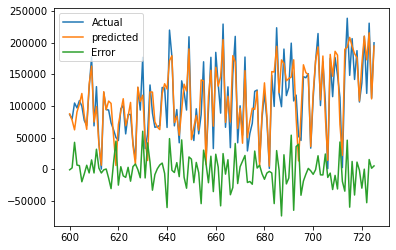

In [36]:
comp.plot()

In [37]:
from sklearn import metrics

In [38]:
np.sqrt(metrics.mean_squared_error(y_,y_pred))

26162.65398182642

In [79]:
import pickle


In [80]:
import pickle
filename_2 = 'best_model.pkl'
pickle.dump(reg, open(filename_2, 'wb'))

In [81]:
loaded_model_1 = pickle.load(open(filename_2, 'rb'))

In [82]:
X_

,f1,f2,f3,f4,year,month_cos,quarter_sin
600,8.641438e+06,2.325629e+06,3.439976,15.624170,1,1.000000,-2.449294e-16
601,7.790484e+06,2.255753e+06,3.171302,15.264951,1,1.000000,-2.449294e-16
602,5.657075e+06,1.776562e+06,2.380652,14.701497,1,1.000000,-2.449294e-16
603,1.076714e+07,7.114696e+06,2.189750,14.269537,1,1.000000,-2.449294e-16
604,1.135843e+07,5.079207e+06,3.989318,14.754715,1,1.000000,-2.449294e-16
...,...,...,...,...,...,...,...
721,4.664200e+07,1.156030e+07,3.674692,15.884686,2,-0.500000,1.224647e-16
722,2.012236e+07,8.883276e+06,4.301227,15.220505,2,-0.866025,1.224647e-16
723,4.660128e+07,9.995096e+06,3.077142,15.356453,2,-0.866025,1.224647e-16
724,1.225508e+07,4.909352e+06,1.780052,15.004197,2,-0.866025,1.224647e-16


In [87]:
new_1=np.array([[7.790484e+06,2.255753e+06,3.171302,15.264951,1,1.000000,-2.449294e-16]])

In [88]:
loaded_model_1.predict(new_1)

array([79271.53357844])

In [86]:
y_

600     86287.17
601     79380.38
602    104509.01
603     96828.96
604    108327.11
         ...    
721    210099.11
722    119775.95
723    230699.43
724    112431.95
725    199708.63
Name: Income, Length: 126, dtype: float64

In [118]:
n_samples = X.shape[0]
n_features = X.shape[1]


In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint


In [70]:
# Hyperparameters range

parameters= {'n_estimators': range(100,650),
               'max_features': ['auto','sqrt','log2'],
               'max_depth': range(2,14,2),
               'min_samples_split': range(1,10),
               'min_samples_leaf': range(0,10),
              'criterion':['mse','mae']}

In [71]:

# applying randomizedsearchcv on paramers using model
randomsearch=RandomizedSearchCV(estimator=reg,param_distributions=parameters,n_iter=100,cv=3,verbose=2,
                               random_state=42,n_jobs=-1)

In [72]:
randomsearch.fit(X,y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(max_depth=6, n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': range(2, 14, 2),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(0, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 650)},
                   random_state=42, verbose=2)

In [73]:
randomsearch.best_params_

{'n_estimators': 130,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'mse'}

In [85]:
reg_1 = ExtraTreesRegressor(n_estimators = 130,criterion='mse',max_features='auto',max_depth= 6,min_samples_split=5,n_jobs =-1
)


In [86]:
reg_1.fit(X,y)

ExtraTreesRegressor(max_depth=6, min_samples_split=5, n_estimators=130,
                    n_jobs=-1)

In [87]:
reg_1.score(X,y)

0.8041748679211795

In [88]:
reg_1.score(X_,y_)

0.7722821004761662

In [89]:
y_pred_2=reg_1.predict(X_)

In [90]:
y_pred_2

array([ 86521.2742577 ,  78980.89983269,  63209.84441582,  87750.91297793,
        97799.21788074, 120220.60190386,  85296.05858149,  63930.29653518,
       142434.14622232, 162446.65094367,  78511.73966286,  96730.15687842,
        37093.11049792,   6631.30238783, 130353.73317747,  94181.43496441,
       111044.42610787, 104182.74538865,  51108.16021038,   5505.05465491,
        66767.68618449,  92721.14075773, 112789.07954137,  66163.1340658 ,
        83602.82656158, 105946.13660966,  38651.92788633,   6600.77192663,
       135072.05869041, 105151.44389722, 128538.4003842 ,  48261.38018835,
        13794.13479926, 124027.94790213, 130819.37326333,  74430.6189099 ,
        68600.1676571 ,  62905.45619422, 136095.63534957, 143990.73959203,
       137720.6229657 , 183936.44950975, 173556.27983966,  74613.26684485,
        85071.61004022,  56589.4861387 ,  90846.5172014 , 138334.09891981,
       130442.48183718, 196690.9746092 ,  46002.29100472,  66126.15613435,
        87709.96834308,  

In [91]:
comp_2=pd.DataFrame({'Actual':y_,'predicted':y_pred_2})

In [92]:
comp_2['Error']=comp_2['Actual']-comp_2['predicted']

In [93]:
comp_2[100:]

,Actual,predicted,Error
700,111854.06,127086.083860,-15232.023860
701,170855.38,179564.018533,-8708.638533
702,214339.31,201191.016551,13148.293449
703,100522.57,109804.058182,-9281.488182
704,169657.57,187088.344077,-17430.774077
705,106669.07,90642.008920,16027.061080
706,825.00,17848.659274,-17023.659274
707,175095.83,188801.950470,-13706.120470
708,114572.65,160107.389867,-45534.739867
709,176344.04,190425.716716,-14081.676716


In [83]:
from sklearn import metrics

In [84]:
np.sqrt(metrics.mean_squared_error(y_,y_pred_2))

27013.143034650864

<AxesSubplot:>

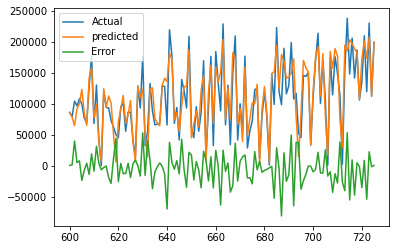

In [77]:
comp_2.plot()

In [78]:
y_.mean()

109020.9817460318

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
reg.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=6, n_jobs=-1)

In [81]:
reg.score(X_train,y_train)

0.8293446896518881

In [82]:
reg.score(X_test,y_test)

0.7395499657902502

In [83]:
reg.score(X_,y_)

0.767803164107298